# Credit Risk analysis 

In this project we will access based on the marketing campaign by a bank and the credit history of the client to determine if he is a potential customer for the term deposit and will subscibe to it or not.<br> 

**Target variable** :*has the client subscribed a term deposit? (binary: "yes","no")*
    
**Features**<br>
pdays: *Days passed by since the last contact to the client from a previous campaign (-1 means client was not                            contacted previously)*<br>

previous: *number of contacts performed before this campaign and for this client*<br>

poutcome: *outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")*<br>

housing: *has housing loan?* <br>

loan: *has personal loan?*<br>

default: *EMI defaults to the credit card. (binary: "yes","no")*<br>

day: *last contact day of the month*<br>

month: *last contact month of year* <br>

duration: *last contact duration, in seconds*<br>

campaign: *number of contacts performed during this campaign and for this client*<br>

contact: *contact communication type*<br>

Other features are self explanatory that include the client info(age, job, education, balance, marital)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt 
from IPython.display import Image  

In [2]:
dummy_df = pd.read_csv("bank.csv", na_values =['NA'])
cols = dummy_df.columns.values
cols

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

# EDA

In [3]:
dummy_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [4]:
dummy_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
dummy_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
dummy_df.corr()>0.75  ## no variables have high correlation

,age,balance,day,duration,campaign,pdays,previous
age,True,False,False,False,False,False,False
balance,False,True,False,False,False,False,False
day,False,False,True,False,False,False,False
duration,False,False,False,True,False,False,False
campaign,False,False,False,False,True,False,False
pdays,False,False,False,False,False,True,False
previous,False,False,False,False,False,False,True


In [7]:
dummy_df['pdays'].unique()

array([ -1, 166,  91, 147, 170, 150, 171, 126, 182, 110, 198, 174, 175,
        27, 128, 100, 177, 167, 122, 183, 195, 133, 178,  34,  10, 163,
       184, 154,  99,  93,   2, 242, 272,  76, 160,  90, 196, 246, 238,
       203, 268, 189, 267,  92,   9,  88,  85, 210, 257, 261, 270, 106,
       199, 112,  41, 294, 231, 239, 302, 135, 307, 222, 138, 323, 141,
       320, 264, 316, 315, 256, 146, 328,  74, 148, 327, 341, 145, 266,
       234, 345, 318, 325, 274, 343, 260, 305, 344, 254, 180, 340,  82,
       181, 278, 153,   4, 349, 334, 176,  87, 269,  86, 169,  83,  79,
         6, 259,  13, 161, 350,  84,  80, 164,  22, 296,  66, 263, 333,
        17,  89,  78, 286, 337, 364, 188, 342, 363, 352, 295, 353, 356,
       288, 367, 366, 359, 347, 370, 284, 300, 306, 361, 287, 301, 355,
       371, 292, 360, 358, 346, 357, 368, 312, 179, 329, 298, 372, 374,
       375, 291,  95, 109,  94,  98, 186, 101, 187, 321,  40,  96,  21,
        35,  97, 285, 103, 212, 293,  81,  38,  28,  67,  60, 12

In [8]:
dummy_df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [9]:
dummy_df['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

<AxesSubplot:xlabel='deposit', ylabel='count'>

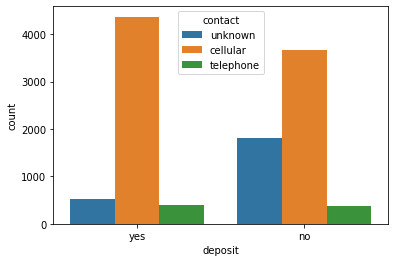

In [10]:
sns.countplot(data=dummy_df,hue=dummy_df['contact'],x=dummy_df['deposit'])  ## we will check it later if removing this affects our model

<AxesSubplot:xlabel='age', ylabel='balance'>

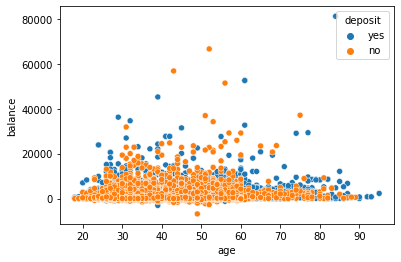

In [11]:
sns.scatterplot(x='age', y='balance',hue='deposit', data=dummy_df)  ## relation between age and balance based on the target

<AxesSubplot:xlabel='age', ylabel='duration'>

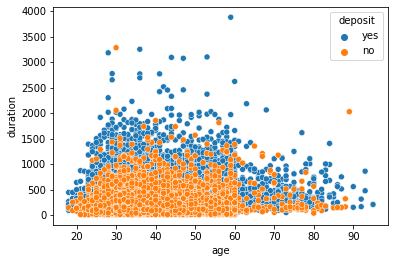

In [12]:
sns.scatterplot(x='age', y='duration',hue='deposit', data=dummy_df)

<AxesSubplot:xlabel='age', ylabel='education'>

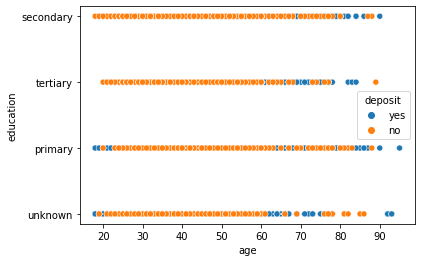

In [13]:
sns.scatterplot(x='age', y='education',hue='deposit', data=dummy_df)

<AxesSubplot:xlabel='deposit', ylabel='count'>

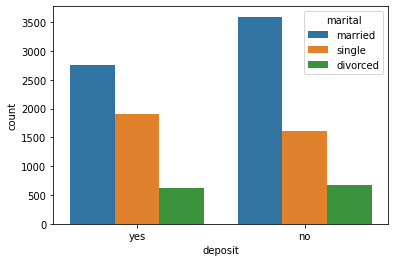

In [14]:
sns.countplot(data=dummy_df,hue=dummy_df['marital'],x=dummy_df['deposit']) 

## Balance column

C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

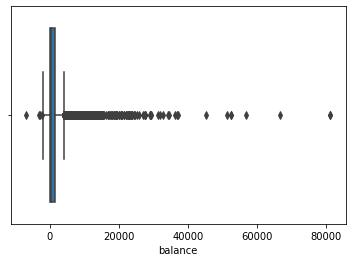

In [15]:
sns.boxplot(dummy_df['balance'])  # there are a lot of outliers

C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

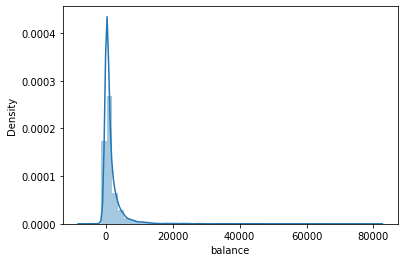

In [16]:
sns.distplot(dummy_df['balance'])  # distribution of balance data

In [17]:
Q1 = np.percentile(dummy_df['balance'], 25)   #25th percentile  
Q3 = np.percentile(dummy_df['balance'], 75)   #75th percentile
IQR = Q3 - Q1

In [18]:
nfifth = np.percentile(dummy_df['balance'], 95)   #95th percentile
fifth = np.percentile(dummy_df['balance'], 5)     #5th percentile

In [19]:
# dummy_df['balance'][Q3<=dummy_df['balance']]

In [20]:
# dummy_df['balance'][Q1>=dummy_df['balance']]

In [21]:
# dummy_df['balance'][(Q3+1.5*IQR)<=dummy_df['balance']]

In [22]:
# dummy_df['balance'][(Q1-1.5*IQR)>=dummy_df['balance']]

In [23]:
# dummy_df['balance'][(nfifth)<=dummy_df['balance']]

In [24]:
# dummy_df['balance'][(fifth)>=dummy_df['balance']]

### Flooring and capping

#### method 1

Replacing outliers with Q3+1.5xIQR and Q1-1.5xIQR

In [25]:
upper = np.where(dummy_df['balance'] >= (Q3+1.5*IQR))
lower = np.where(dummy_df['balance'] <= (Q1-1.5*IQR))
 

df1=dummy_df.copy()
df1.loc[upper[0],'balance']=Q3+1.5*IQR
df1.loc[lower[0],'balance']=Q1-1.5*IQR

#### removed outliers

In [26]:
# df1

In [27]:
df1['balance'][(Q3+1.5*IQR)<df1['balance']]

Series([], Name: balance, dtype: int64)

C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

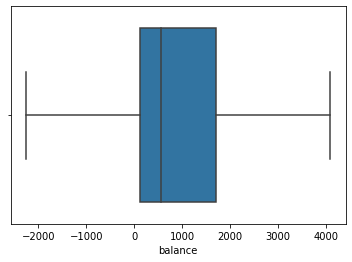

In [28]:
sns.boxplot(df1['balance'])

C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

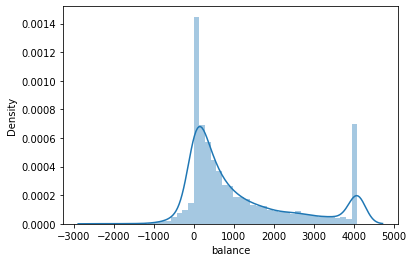

In [29]:
sns.distplot(df1['balance'])

#### method 2

Replacing outliers with 95th percentile and 5th percentile values

In [30]:
upper = np.where(dummy_df['balance'] >= nfifth)
lower = np.where(dummy_df['balance'] <= fifth)
 

df2=dummy_df.copy()
df2.loc[upper[0],'balance']=nfifth
df2.loc[lower[0],'balance']=fifth

#### removed outliers

In [31]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,no


C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

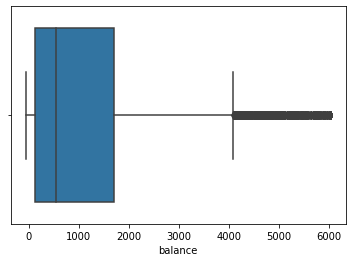

In [32]:
sns.boxplot(df2['balance'])

C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

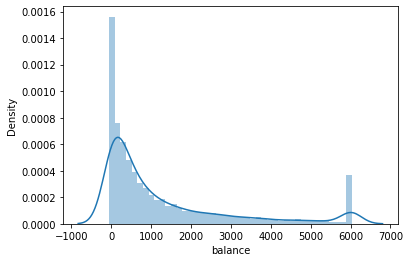

In [33]:
sns.distplot(df2['balance'])

#### method 3

Replacing outliers with 75th and 25th percentile values

In [34]:
upper = np.where(dummy_df['balance'] >= Q3)
lower = np.where(dummy_df['balance'] <= Q1)
 

df3=dummy_df.copy()
df3.loc[upper[0],'balance']=Q3
df3.loc[lower[0],'balance']=Q1

#### removed outliers

In [35]:
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,1708,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,122,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,1708,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,122,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,122,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,122,no,yes,cellular,8,may,9,2,172,5,failure,no


C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

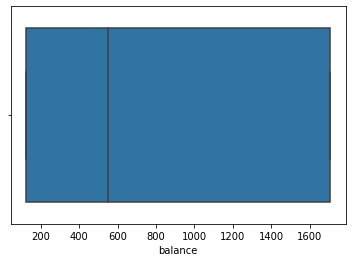

In [36]:
sns.boxplot(df3['balance'])

C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

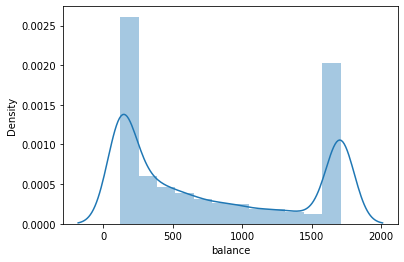

In [37]:
sns.distplot(df3['balance'])

## Duration column

C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

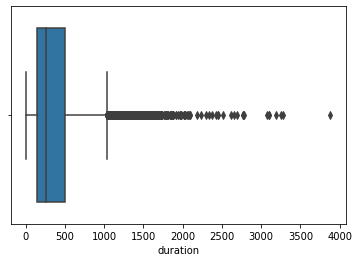

In [38]:
sns.boxplot(dummy_df['duration'])  ## we can see the presence of outliers

In [39]:
Q1 = np.percentile(dummy_df['duration'], 25)   #25th percentile  
Q3 = np.percentile(dummy_df['duration'], 75)   #75th percentile
IQR = Q3 - Q1

In [40]:
nfifth = np.percentile(dummy_df['duration'], 95)  #95th percentile
fifth = np.percentile(dummy_df['duration'], 5)    #5th percentile

### Flooring and capping

#### method 1

Replacing outliers with Q3+1.5xIQR and Q1-1.5xIQR

In [41]:
upper = np.where(dummy_df['duration'] >= (Q3+1.5*IQR))
lower = np.where(dummy_df['duration'] <= (Q1-1.5*IQR))

df11=df1.copy()

df11.loc[upper[0],'duration']=Q3+1.5*IQR
df11.loc[lower[0],'duration']=Q1-1.5*IQR

#### method 2

Replacing outliers with 95th percentile and 5th percentile values

In [42]:
upper = np.where(dummy_df['duration'] >= nfifth)
lower = np.where(dummy_df['duration'] <= fifth)

df22=df2.copy()

df22.loc[upper[0],'duration']=nfifth
df22.loc[lower[0],'duration']=fifth

#### method 3

Replacing outliers with 75th and 25th percentile values

In [43]:
upper = np.where(dummy_df['duration'] >= Q3)
lower = np.where(dummy_df['duration'] <= Q1)

df33=df3.copy()
 
df33.loc[upper[0],'duration']=Q3
df33.loc[lower[0],'duration']=Q1

## Encoding

### LabelEncoding

In [44]:
def Label_Encoding(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['day_of_week'] = le.fit_transform(res_df['day'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

### One hot encoding

In [45]:
def one_hot_encoding(df):
    one_hot_df_x  = pd.get_dummies(df.drop(['deposit'],axis =1))
    le = preprocessing.LabelEncoder()  # just for the target variable
    res_df = dummy_df.copy()
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    x=one_hot_df_x.values
    y=res_df['deposit'].values
    return x,y

## Effect of outlier removal and encoding on the model accuracy

### no outlier removal with label encoding

In [46]:
encoded_df = Label_Encoding(dummy_df)

x = encoded_df.drop(['deposit'],axis =1).values
y = encoded_df['deposit'].values

In [47]:
param_dist = {'max_depth': [20,30,35,36,37],             
              'criterion': ['gini'],
             'min_samples_split': [2,10,20,40,60,70],
             'min_samples_leaf':[1,5,10,20]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 60}
Best score using grid search: 
 0.7921572119380189


### method 1 with label encoding

In [48]:
encoded_df1 = Label_Encoding(df11)

x = encoded_df1.drop(['deposit'],axis =1).values
y = encoded_df1['deposit'].values

In [49]:
param_dist = {'max_depth': [20,30,35,36,37],             
              'criterion': ['gini'],
             'min_samples_split': [2,10,20,40,60,70],
             'min_samples_leaf':[1,5,10,20]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 36, 'min_samples_leaf': 10, 'min_samples_split': 60}
Best score using grid search: 
 0.7977976402486179


### method 2 with label encoding

In [50]:
encoded_df2 = Label_Encoding(df22)

x = encoded_df2.drop(['deposit'],axis =1).values
y = encoded_df2['deposit'].values

In [51]:
param_dist = {'max_depth': [20,30,35,36,37],             
              'criterion': ['gini'],
             'min_samples_split': [2,10,20,40,60,70],
             'min_samples_leaf':[1,5,10,20]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 37, 'min_samples_leaf': 10, 'min_samples_split': 60}
Best score using grid search: 
 0.7973496115747827


### method 3 with label encoding

In [52]:
encoded_df3 = Label_Encoding(df33)

x = encoded_df3.drop(['deposit'],axis =1).values
y = encoded_df3['deposit'].values

In [53]:
param_dist = {'max_depth': [20,30,35,36,37],             
              'criterion': ['gini'],
             'min_samples_split': [2,10,20,40,60,70],
             'min_samples_leaf':[1,5,10,20]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 60}
Best score using grid search: 
 0.7749568416425204


In [54]:
## one hot encoding

### no outlier removal with one hot encoding

In [55]:
x=one_hot_encoding(dummy_df)[0]
y=one_hot_encoding(dummy_df)[1]

In [56]:
param_dist = {'max_depth': [10,15,20,30,35,36,37,38,39,40],             
              'criterion': ['gini'],
             'min_samples_split': [60,70,75,80,85,90],
             'min_samples_leaf':[1,2,3,5,10]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 80}
Best score using grid search: 
 0.8031744656546114


### method 1 with one hot encoding

In [57]:
x=one_hot_encoding(df11)[0]
y=one_hot_encoding(df11)[1]

In [58]:
param_dist = {'max_depth': [20,30,35,36,37,38,39,40],             
              'criterion': ['gini'],
             'min_samples_split': [60,70,75,80,85,90],
             'min_samples_leaf':[1,2,3,5,10]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 5, 'min_samples_split': 80}
Best score using grid search: 
 0.7938632505783861


### method 2 with one hot encoding

In [59]:
x=one_hot_encoding(df22)[0]
y=one_hot_encoding(df22)[1]

In [60]:
param_dist = {'max_depth': [20,30,35,36,37,38,39,40],             
              'criterion': ['gini'],
             'min_samples_split': [60,70,75,80,85,90],
             'min_samples_leaf':[1,2,3,5,10]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 80}
Best score using grid search: 
 0.7942216735174543


### method 3 with one hot encoding

In [61]:
x=one_hot_encoding(df33)[0]
y=one_hot_encoding(df33)[1]

In [62]:
param_dist = {'max_depth': [20,30,35,36,37,38,39,40],             
              'criterion': ['gini'],
             'min_samples_split': [60,70,75,80,85,90],
             'min_samples_leaf':[1,2,3,5,10]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 37, 'min_samples_leaf': 5, 'min_samples_split': 90}
Best score using grid search: 
 0.7866973588368742


**Let us also look at if we only treat the outliers of balance column**  

### method 1 on balance with one hot encoding

In [63]:
x=one_hot_encoding(df1)[0]
y=one_hot_encoding(df1)[1]

In [64]:
param_dist = {'max_depth': [20,30,35,36,37,38,39,40],             
              'criterion': ['gini'],
             'min_samples_split': [60,70,75,80,85,90],
             'min_samples_leaf':[1,2,3,5,10]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 5, 'min_samples_split': 80}
Best score using grid search: 
 0.802547225511242


### method 2 on balance with one hot encoding

In [65]:
x=one_hot_encoding(df2)[0]
y=one_hot_encoding(df2)[1]

In [66]:
param_dist = {'max_depth': [20,30,35,36,37,38,39,40],             
              'criterion': ['gini'],
             'min_samples_split': [60,70,75,80,85,90],
             'min_samples_leaf':[1,2,3,5,10]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 36, 'min_samples_leaf': 5, 'min_samples_split': 80}
Best score using grid search: 
 0.8028160427155431


### method 3 on balance with one hot encoding

In [67]:
x=one_hot_encoding(df3)[0]
y=one_hot_encoding(df3)[1]

In [68]:
param_dist = {'max_depth': [20,30,35,36,37,38,39,40],             
              'criterion': ['gini'],
             'min_samples_split': [60,70,75,80,85,90],
             'min_samples_leaf':[1,2,3,5,10]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 80}
Best score using grid search: 
 0.7908202654960965


### method 1 on balance with label encoding

In [69]:
encoded_df1 = Label_Encoding(df1)

x = encoded_df1.drop(['deposit'],axis =1).values
y = encoded_df1['deposit'].values

In [70]:
param_dist = {'max_depth': [20,30,35,36,37],             
              'criterion': ['gini'],
             'min_samples_split': [2,10,20,40,60,70],
             'min_samples_leaf':[1,5,10,20]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 60}
Best score using grid search: 
 0.792515634877087


### method 2 on balance with label encoding

In [71]:
encoded_df2 = Label_Encoding(df2)

x = encoded_df2.drop(['deposit'],axis =1).values
y = encoded_df2['deposit'].values

In [72]:
param_dist = {'max_depth': [20,30,35,36,37],             
              'criterion': ['gini'],
             'min_samples_split': [2,10,20,40,60,70],
             'min_samples_leaf':[1,5,10,20]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 36, 'min_samples_leaf': 10, 'min_samples_split': 60}
Best score using grid search: 
 0.7923364234075528


### method 3 on balance with label encoding

In [73]:
encoded_df3 = Label_Encoding(df3)

x = encoded_df3.drop(['deposit'],axis =1).values
y = encoded_df3['deposit'].values

In [74]:
param_dist = {'max_depth': [20,30,35,36,37],             
              'criterion': ['gini'],
             'min_samples_split': [2,10,20,40,60,70],
             'min_samples_leaf':[1,5,10,20]}

cv_rf = GridSearchCV(DecisionTreeClassifier(), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_rf.fit(x,y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Best score using grid search: \n', cv_rf.best_score_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 37, 'min_samples_leaf': 5, 'min_samples_split': 60}
Best score using grid search: 
 0.7944838324621442


From the above analysis we conclude that we get the maximum accuracy for the model when we dont treat the outliers and use one hot encoding, which is understandable since decision tree is not much affected by the outliers. Also when we treat outliers in balance column using method 2 and use one hot encoding, it gives us accuracy close to the max accuracy.

## understanding the importance of some variables

In [75]:
encoded_df = Label_Encoding(dummy_df)

x = encoded_df.drop(['deposit'],axis =1).values
y = encoded_df['deposit'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [76]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini")
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.8577668271922948
Testing score:  0.8092252575011196


In [77]:
encoded_df = Label_Encoding(dummy_df)
en_df=encoded_df.drop(['duration'],axis=1)
x = en_df.drop(['deposit'],axis =1).values
y = en_df['deposit'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [78]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini")
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.7274050845559413
Testing score:  0.7026421854008061


In [79]:
encoded_df = Label_Encoding(dummy_df)
en_df=encoded_df.drop(['contact'],axis=1)
x = en_df.drop(['deposit'],axis =1).values
y = en_df['deposit'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [80]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini")
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.8546309777130697
Testing score:  0.7944469323779668


So removing the variables 'duration' and 'contact' decreases accuracy, thus are important. Removing duration results in large  reduction in the accuracy, thus indicating it as an important variable.

# Final Model building

## Manual hyper parameter tuning

**Using hit and trial for selecting optimal parameters for high accuracy**

In [81]:
x=one_hot_encoding(dummy_df)[0]
y=one_hot_encoding(dummy_df)[1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [82]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=30, criterion = "gini", min_samples_split= 25,min_samples_leaf=16)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

## choosing random values for the parameters

Training score:  0.8689662896180983
Testing score:  0.8271383788625168


In [83]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=90, criterion = "gini", min_samples_split= 25,min_samples_leaf=16)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

## increasing max depth has no effect, so let us tweak other parameters

Training score:  0.8689662896180983
Testing score:  0.8271383788625168


In [84]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=90, criterion = "gini", min_samples_split= 20,min_samples_leaf=10)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

## it has improved further

Training score:  0.8853175047597716
Testing score:  0.8289296909986565


In [85]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=90, criterion = "gini", min_samples_split= 18,min_samples_leaf=7)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

## this looks like the best for now

Training score:  0.8941650800761564
Testing score:  0.8293775190326914


In [86]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=90, criterion = "gini", min_samples_split= 17,min_samples_leaf=6)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

## reducing the min_samples_split and min_samples_leaf further reduces the test accuracy

Training score:  0.8983088811737037
Testing score:  0.819525302283923


In [87]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=90, criterion = "gini", min_samples_split= 7,min_samples_leaf=4)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

## more reduction

Training score:  0.924515623250084
Testing score:  0.8016121809225257


In [88]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=90, criterion = "gini", min_samples_split= 19,min_samples_leaf=8)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

## now we can see that it is decreasing, if we increase the min_samples_split and min_samples_leaf from their optimal values found earlier 

Training score:  0.8906932467241573
Testing score:  0.8289296909986565


In [89]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=95, criterion = "gini", min_samples_split= 18,min_samples_leaf=7)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

## also increasing max_depth now has no further effect

Training score:  0.8941650800761564
Testing score:  0.8293775190326914


In [90]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=15, criterion = "gini", min_samples_split= 18,min_samples_leaf=7)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

## decreasing max_depth leads to an increase!

Training score:  0.8901332736028671
Testing score:  0.8316166592028661


In [91]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=16, criterion = "gini", min_samples_split= 18,min_samples_leaf=7)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

## increasing above this max_depth value leads to a decrease again

Training score:  0.8914772090939634
Testing score:  0.8284818629646216


In [92]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=14, criterion = "gini", min_samples_split= 18,min_samples_leaf=7)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

## decreasing max_depth further from this value will lead to less accuracy, so this is the best for now

Training score:  0.8874454026206742
Testing score:  0.8338557993730408


In [93]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=14, criterion = "gini", min_samples_split= 18,min_samples_leaf=8)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

## tweaking the other 2 parameters a bit, leads to these optimal parameters

Training score:  0.8861014671295778
Testing score:  0.8356471115091805


In [94]:
#### so the optimal parameters from hit and trial comes out to be max_depth=14, min_samples_split= 18, min_samples_leaf=8

### Performance metrics

Using the optimal parameters that we found to fit the model and find the performance metrics

In [104]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=14, criterion = "gini", min_samples_split= 18,min_samples_leaf=8)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=8, min_samples_split=18,
                       random_state=1)

In [105]:
## confusion matrix

predictions = model_dt.predict(x_test)
print (confusion_matrix(y_test, predictions))

[[968 198]
 [169 898]]


In [110]:
print('Accuracy Score: ',accuracy_score(y_test, predictions))

Accuracy Score:  0.8356471115091805


In [107]:
from sklearn import metrics
print("Recall:",metrics.recall_score(y_test, predictions))

Recall: 0.8416119962511716


In [109]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1166
           1       0.82      0.84      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



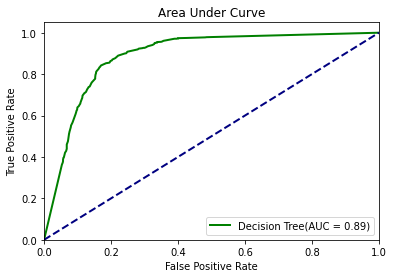

In [477]:
##For ROC and AUC
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [480]:
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

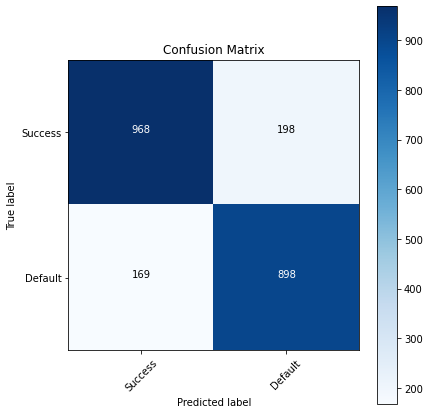

In [481]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

## GridSearchCV

In [ ]:
x=one_hot_encoding(dummy_df)[0]
y=one_hot_encoding(dummy_df)[1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [489]:
model_dt = DecisionTreeClassifier(random_state=1)

In [512]:
param_dist = {'max_depth': [8,10,14,20,25,30,35,40],             
              'criterion': ['gini'],
             'min_samples_split': [2,10,18,20,40,60,70,80,90],
             'min_samples_leaf':[1,4,5,8,10,15]}

cv_dt = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3, return_train_score=True)

cv_dt.fit(x,y)
print('Best Parameters using grid search: \n', cv_dt.best_params_)
print('Best score using grid search: \n', cv_dt.best_score_)

## the accuracy here would be less (compared to just using train_test_split) since this is using cross validation for test accuracy estimation

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 80}
Best score using grid search: 
 0.8031744656546114


In [112]:
model_dt.set_params(max_depth=25, criterion = "gini", min_samples_split= 80,min_samples_leaf=5)  # setting the best parameters found above

model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test) 

Training score:  0.8640385261507447
Testing score:  0.8222122704881325


### Performance metrics

In [113]:
## confusion matrix

predictions = model_dt.predict(x_test)
print (confusion_matrix(y_test, predictions))

[[945 221]
 [176 891]]


In [102]:
from sklearn import metrics
print("Recall:",metrics.recall_score(y_test, predictions))

Recall: 0.8350515463917526


In [114]:
print('Accuracy Score: ',accuracy_score(y_test, predictions))

Accuracy Score:  0.8222122704881325


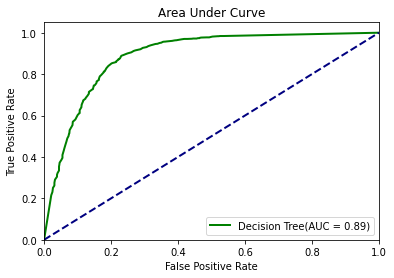

In [536]:
##For ROC and AUC
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

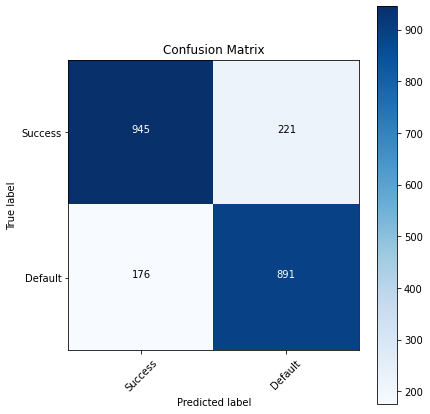

In [523]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

# Conclusion

The model for the credit risk analysis was built, that predicts the term deposit subscription by a customer with the best accuracy of 83.5 and AUC of 0.89